In [1]:
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_train = pd.read_csv('./duranduranreturns_data/data/train.csv',encoding = 'UTF-8')
df_test= pd.read_csv('./duranduranreturns_data/data/test.csv',encoding = 'UTF-8')
df_interest_rate=pd.read_csv("./duranduranreturns_data/interest_rates.csv")

In [4]:
df_train.isna().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        91813
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 9
lowest_building_in_sites                  9
heat_type                              2017
heat_fuel                              9667
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              691
bathroom_count                  

In [5]:
df_test.isna().sum()

key                                     0
apartment_id                            0
city                                    0
transaction_year_month                  0
transaction_date                        0
year_of_completion                      0
exclusive_use_area                      0
floor                                   0
latitude                                0
longitude                               0
address_by_law                          0
total_parking_capacity_in_site        371
total_household_count_in_sites          0
apartment_building_count_in_sites       0
tallest_building_in_sites               1
lowest_building_in_sites                1
heat_type                              28
heat_fuel                              48
room_id                                 0
supply_area                             0
total_household_count_of_area_type      0
room_count                              5
bathroom_count                          5
front_door_structure              

In [6]:
df_total=pd.concat([df_train,df_test],axis=0)

In [7]:
len(df_train)+len(df_test), len(df_total)

(1605376, 1605376)

In [8]:
df_total.dtypes

key                                     int64
apartment_id                            int64
city                                    int64
transaction_year_month                  int64
transaction_date                       object
year_of_completion                      int64
exclusive_use_area                    float64
floor                                   int64
latitude                              float64
longitude                             float64
address_by_law                          int64
total_parking_capacity_in_site        float64
total_household_count_in_sites          int64
apartment_building_count_in_sites       int64
tallest_building_in_sites             float64
lowest_building_in_sites              float64
heat_type                              object
heat_fuel                              object
room_id                                 int64
supply_area                           float64
total_household_count_of_area_type      int64
room_count                        

In [9]:
df_total.isna().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        92184
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                10
lowest_building_in_sites                 10
heat_type                              2045
heat_fuel                              9715
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              696
bathroom_count                  

In [10]:
df_total['heat_fuel']=df_total['heat_fuel'].fillna("-")
df_total['front_door_structure']=df_total['front_door_structure'].fillna("-")

In [11]:
df_total.isna().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        92184
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                10
lowest_building_in_sites                 10
heat_type                              2045
heat_fuel                                 0
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              696
bathroom_count                  

In [12]:
# df_train['city'] = df_train.city.apply(lambda x: 'seoul' if x == 1 else 'busan')
# #convert interval unit to date
df_total['transaction_date'] = df_total.transaction_date.apply(lambda x: x[-2:])
# #convert int to date
df_total['transaction_year_month'] = df_total['transaction_year_month'].astype(str)
# #join month and date 
df_total['transaction_year_month_date'] = df_total[['transaction_year_month','transaction_date']].apply(lambda x: ''.join(x), axis=1)
# #convert  month and date to datetime 
df_total['transaction_year_month_date'] = pd.to_datetime(df_total['transaction_year_month_date'])
df_total.columns
# df_train["year"] = df_train["transaction_year_month_date"].dt.year
# df_train["month"] = df_train["datetime"].dt.month
# df_train["day"] = df_train["datetime"].dt.day
# df_train["hour"] = df_train["datetime"].dt.hour

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'transaction_real_price',
       'transaction_year_month_date'],
      dtype='object')

In [13]:
len(df_total.columns)

26

In [14]:
df_total

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,transaction_year_month_date
0,0,5584,1,200601,20,1999,47.4300,6,37.585965,127.000231,...,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000,2006-01-20
1,1,5584,1,200601,20,1999,44.3700,8,37.585965,127.000231,...,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000,2006-01-20
2,2,5059,1,200601,20,1992,54.7000,8,37.580511,127.014016,...,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000,2006-01-20
3,3,2816,1,200601,20,1993,64.6600,11,37.580324,127.011788,...,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000,2006-01-20
4,4,2816,1,200601,20,1993,106.6200,7,37.580324,127.011788,...,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000,2006-01-20
5,5,2815,1,200601,20,2000,84.9200,9,37.575381,126.960804,...,individual,gas,5831,109.88,454,3.0,2.0,stairway,415000000,2006-01-20
6,6,2815,1,200601,20,2000,60.0000,13,37.575381,126.960804,...,individual,gas,5833,84.33,207,3.0,1.0,corridor,267000000,2006-01-20
7,7,9867,1,200601,20,2005,84.7600,10,37.559200,127.019503,...,individual,gas,11862,104.30,82,3.0,2.0,stairway,415000000,2006-01-20
8,8,2818,1,200601,20,1999,84.8800,18,37.555060,127.014495,...,individual,gas,5843,107.65,576,3.0,2.0,stairway,310000000,2006-01-20
9,9,2817,1,200601,20,2002,59.9400,12,37.549828,127.009284,...,individual,gas,5842,85.90,864,3.0,1.0,corridor,319000000,2006-01-20


# outlier 다음에 꼭 채워보자

In [15]:
# df_trainWithoutOutliers = df_train[np.abs(df_train["count"] - df_train["count"].mean()) <= (3*df_train["count"].std())]

# print(df_train.shape) #outlier 제거 전
# print(df_trainWithoutOutliers.shape) #outlier제거 후

# 결측치 뿌시기

In [16]:
df_total.isna().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        92184
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                10
lowest_building_in_sites                 10
heat_type                              2045
heat_fuel                                 0
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              696
bathroom_count                  

In [17]:
a=df_total[df_total.isna()==False]
a.isna().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        92184
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                10
lowest_building_in_sites                 10
heat_type                              2045
heat_fuel                                 0
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              696
bathroom_count                  

In [18]:
df_na_park=df_total[df_total['total_parking_capacity_in_site'].isna()==True]
df_park=df_total[df_total['total_parking_capacity_in_site'].isna()==False]
df_na_heat_type=df_total[df_total['heat_type'].isna()==True]
df_heat_type=df_total[df_total['heat_type'].isna()==False]
df_na_heat_fuel=df_total[df_total['heat_fuel']=="-"]
df_heat_fuel=df_total[df_total['heat_fuel']!="-"]
df_na_room=df_total[df_total['room_count'].isna()==True]
df_room=df_total[df_total['room_count'].isna()==False]
df_na_bath=df_total[df_total['bathroom_count'].isna()==True]
df_bath=df_total[df_total['bathroom_count'].isna()==False]
df_na_front_door=df_total[df_total['front_door_structure']=='-']
df_front_door=df_total[df_total['front_door_structure']!='-']
df_na_tall=df_total[df_total['tallest_building_in_sites'].isna()==True]
df_tall=df_total[df_total['tallest_building_in_sites'].isna()==False]


In [19]:
len(df_na_park), len(df_na_heat_type), len(df_na_heat_fuel), len(df_na_room), len(df_na_bath), len(df_na_front_door), 

(92184, 2045, 18733, 696, 696, 13959)

In [20]:
df_park.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price
key,1.0,0.2,0.082,0.17,0.074,0.033,0.08,-0.082,-0.081,0.073,0.038,0.055,0.07,0.021,0.016,0.084,-0.041,0.056,0.11,0.29
apartment_id,0.2,1.0,-0.17,0.67,0.16,0.099,-0.17,0.16,0.17,0.14,0.03,0.088,0.23,0.14,0.25,0.21,-0.18,0.11,0.36,0.17
city,0.082,-0.17,1.0,-0.097,-0.098,-0.16,1.0,-1.0,-1.0,0.036,0.094,0.15,-0.28,-0.31,-0.29,-0.11,0.016,-0.074,-0.068,0.39
year_of_completion,0.17,0.67,-0.097,1.0,0.23,0.24,-0.098,0.091,0.097,0.18,-0.0084,0.019,0.48,0.26,0.15,0.31,-0.15,0.22,0.52,0.12
exclusive_use_area,0.074,0.16,-0.098,0.23,1.0,0.16,-0.1,0.098,0.099,0.14,-0.029,0.012,0.28,0.2,0.05,0.98,-0.16,0.77,0.64,0.51
floor,0.033,0.099,-0.16,0.24,0.16,1.0,-0.16,0.17,0.16,0.21,0.11,0.003,0.53,0.43,0.11,0.21,0.025,0.094,0.15,0.12
latitude,0.08,-0.17,1.0,-0.098,-0.1,-0.16,1.0,-0.99,-1.0,0.032,0.092,0.14,-0.28,-0.32,-0.29,-0.11,0.016,-0.078,-0.07,0.38
longitude,-0.082,0.16,-1.0,0.091,0.098,0.17,-0.99,1.0,1.0,-0.023,-0.082,-0.14,0.29,0.32,0.28,0.11,-0.014,0.073,0.065,-0.38
address_by_law,-0.081,0.17,-1.0,0.097,0.099,0.16,-1.0,1.0,1.0,-0.033,-0.091,-0.14,0.28,0.31,0.29,0.11,-0.016,0.075,0.068,-0.39
total_parking_capacity_in_site,0.073,0.14,0.036,0.18,0.14,0.21,0.032,-0.023,-0.033,1.0,0.9,0.78,0.42,0.23,-0.11,0.18,0.36,0.11,0.15,0.31


In [21]:
df_room.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price
key,1.0,0.19,0.083,0.16,0.071,0.032,0.082,-0.084,-0.083,0.073,0.039,0.056,0.068,0.019,0.016,0.082,-0.039,0.054,0.11,0.29
apartment_id,0.19,1.0,-0.17,0.64,0.16,0.097,-0.17,0.17,0.17,0.14,0.027,0.087,0.22,0.13,0.26,0.2,-0.18,0.1,0.35,0.16
city,0.083,-0.17,1.0,-0.078,-0.088,-0.15,1.0,-1.0,-1.0,0.036,0.1,0.15,-0.25,-0.3,-0.29,-0.091,0.023,-0.074,-0.057,0.4
year_of_completion,0.16,0.64,-0.078,1.0,0.24,0.26,-0.079,0.073,0.077,0.18,0.02,0.042,0.51,0.28,0.15,0.32,-0.12,0.23,0.52,0.13
exclusive_use_area,0.071,0.16,-0.088,0.24,1.0,0.17,-0.093,0.088,0.089,0.14,-0.02,0.019,0.29,0.22,0.049,0.98,-0.15,0.77,0.65,0.52
floor,0.032,0.097,-0.15,0.26,0.17,1.0,-0.15,0.15,0.15,0.21,0.12,0.013,0.54,0.44,0.11,0.22,0.032,0.1,0.16,0.13
latitude,0.082,-0.17,1.0,-0.079,-0.093,-0.15,1.0,-0.99,-1.0,0.032,0.1,0.15,-0.25,-0.3,-0.3,-0.096,0.023,-0.078,-0.06,0.38
longitude,-0.084,0.17,-1.0,0.073,0.088,0.15,-0.99,1.0,1.0,-0.023,-0.092,-0.14,0.26,0.31,0.29,0.093,-0.02,0.073,0.055,-0.39
address_by_law,-0.083,0.17,-1.0,0.077,0.089,0.15,-1.0,1.0,1.0,-0.033,-0.1,-0.15,0.25,0.3,0.29,0.092,-0.023,0.074,0.058,-0.39
total_parking_capacity_in_site,0.073,0.14,0.036,0.18,0.14,0.21,0.032,-0.023,-0.033,1.0,0.9,0.78,0.42,0.23,-0.11,0.18,0.36,0.11,0.15,0.31


In [22]:
df_bath.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price
key,1.0,0.19,0.083,0.16,0.071,0.032,0.082,-0.084,-0.083,0.073,0.039,0.056,0.068,0.019,0.016,0.082,-0.039,0.054,0.11,0.29
apartment_id,0.19,1.0,-0.17,0.64,0.16,0.097,-0.17,0.17,0.17,0.14,0.027,0.087,0.22,0.13,0.26,0.2,-0.18,0.1,0.35,0.16
city,0.083,-0.17,1.0,-0.078,-0.088,-0.15,1.0,-1.0,-1.0,0.036,0.1,0.15,-0.25,-0.3,-0.29,-0.091,0.023,-0.074,-0.057,0.4
year_of_completion,0.16,0.64,-0.078,1.0,0.24,0.26,-0.079,0.073,0.077,0.18,0.02,0.042,0.51,0.28,0.15,0.32,-0.12,0.23,0.52,0.13
exclusive_use_area,0.071,0.16,-0.088,0.24,1.0,0.17,-0.093,0.088,0.089,0.14,-0.02,0.019,0.29,0.22,0.049,0.98,-0.15,0.77,0.65,0.52
floor,0.032,0.097,-0.15,0.26,0.17,1.0,-0.15,0.15,0.15,0.21,0.12,0.013,0.54,0.44,0.11,0.22,0.032,0.1,0.16,0.13
latitude,0.082,-0.17,1.0,-0.079,-0.093,-0.15,1.0,-0.99,-1.0,0.032,0.1,0.15,-0.25,-0.3,-0.3,-0.096,0.023,-0.078,-0.06,0.38
longitude,-0.084,0.17,-1.0,0.073,0.088,0.15,-0.99,1.0,1.0,-0.023,-0.092,-0.14,0.26,0.31,0.29,0.093,-0.02,0.073,0.055,-0.39
address_by_law,-0.083,0.17,-1.0,0.077,0.089,0.15,-1.0,1.0,1.0,-0.033,-0.1,-0.15,0.25,0.3,0.29,0.092,-0.023,0.074,0.058,-0.39
total_parking_capacity_in_site,0.073,0.14,0.036,0.18,0.14,0.21,0.032,-0.023,-0.033,1.0,0.9,0.78,0.42,0.23,-0.11,0.18,0.36,0.11,0.15,0.31


In [23]:
df_tall.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price
key,1.0,0.19,0.083,0.16,0.071,0.032,0.082,-0.084,-0.082,0.073,0.039,0.056,0.068,0.019,0.016,0.082,-0.039,0.054,0.11,0.29
apartment_id,0.19,1.0,-0.17,0.64,0.16,0.097,-0.17,0.17,0.17,0.14,0.027,0.087,0.22,0.13,0.26,0.2,-0.18,0.1,0.35,0.16
city,0.083,-0.17,1.0,-0.078,-0.088,-0.15,1.0,-1.0,-1.0,0.036,0.1,0.15,-0.25,-0.3,-0.29,-0.091,0.023,-0.074,-0.057,0.4
year_of_completion,0.16,0.64,-0.078,1.0,0.24,0.26,-0.078,0.073,0.077,0.18,0.02,0.042,0.51,0.28,0.15,0.32,-0.12,0.23,0.52,0.13
exclusive_use_area,0.071,0.16,-0.088,0.24,1.0,0.17,-0.093,0.089,0.089,0.14,-0.02,0.019,0.29,0.22,0.048,0.98,-0.15,0.77,0.65,0.52
floor,0.032,0.097,-0.15,0.26,0.17,1.0,-0.15,0.15,0.15,0.21,0.12,0.013,0.54,0.44,0.11,0.22,0.033,0.1,0.16,0.13
latitude,0.082,-0.17,1.0,-0.078,-0.093,-0.15,1.0,-0.99,-1.0,0.032,0.1,0.15,-0.25,-0.3,-0.3,-0.096,0.023,-0.078,-0.06,0.38
longitude,-0.084,0.17,-1.0,0.073,0.089,0.15,-0.99,1.0,1.0,-0.023,-0.092,-0.14,0.26,0.31,0.29,0.093,-0.02,0.073,0.055,-0.39
address_by_law,-0.082,0.17,-1.0,0.077,0.089,0.15,-1.0,1.0,1.0,-0.033,-0.1,-0.15,0.25,0.3,0.29,0.092,-0.023,0.074,0.058,-0.39
total_parking_capacity_in_site,0.073,0.14,0.036,0.18,0.14,0.21,0.032,-0.023,-0.033,1.0,0.9,0.78,0.42,0.23,-0.11,0.18,0.36,0.11,0.15,0.31


In [24]:
df_park1=df_park[['total_parking_capacity_in_site','total_household_count_in_sites','apartment_building_count_in_sites']]

# df_park1.isna().sum()

# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# X, y = df_park1.iloc[:, 1:], df_park1.iloc[:, 0]
# lr.fit(X, y)

# print(lr.coef_,lr.intercept_)

# df_park1['predict']=round(((1.20623668    *df_park1['total_household_count_in_sites'])-(2.78768441 *df_park1['apartment_building_count_in_sites'])-71.40123309386354))

# df_na_park['total_parking_capacity_in_site']=round(((1.20623668*df_na_park['total_household_count_in_sites'])-(2.78768441 *df_na_park['apartment_building_count_in_sites'])-71.40123309386354))

# df_na_park.isna().sum()

# df_park1=pd.concat([df_park,df_na_park],axis=0) 한거에서 결측치 채운 그 값의 열만 뽑아서 이름 바꿔서 대체하자

In [25]:
df_park1.isna().sum()

total_parking_capacity_in_site       0
total_household_count_in_sites       0
apartment_building_count_in_sites    0
dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X, y = df_park1.iloc[:, 1:], df_park1.iloc[:, 0]
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print(lr.coef_,lr.intercept_)

[ 1.20623668 -2.78768441] -71.40123309386354


In [28]:
df_park1['predict']=round(((1.20623668    *df_park1['total_household_count_in_sites'])-(2.78768441 *df_park1['apartment_building_count_in_sites'])-71.40123309386354))
# df_park1[['total_parking_capacity_in_site','predict']]

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_na_park['total_parking_capacity_in_site']=round(((1.20623668*df_na_park['total_household_count_in_sites'])-(2.78768441 *df_na_park['apartment_building_count_in_sites'])-71.40123309386354))
df_na_park

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,transaction_year_month_date
54,54,2491,1,200601,20,1988,59.910,7,37.534389,127.074220,...,individual,gas,147040,78.63,204,2.0,1.0,corridor,245000000,2006-01-20
59,59,2491,1,200601,20,1988,59.910,12,37.534389,127.074220,...,individual,gas,147040,78.63,204,2.0,1.0,corridor,250000000,2006-01-20
67,67,484,1,200601,20,1977,86.120,4,37.532796,126.950925,...,district,cogeneration,1266,112.40,120,4.0,1.0,corridor,470000000,2006-01-20
73,73,4400,1,200601,20,1987,112.410,1,37.541535,126.957337,...,individual,gas,31664,140.50,17,3.0,1.0,stairway,350000000,2006-01-20
121,121,733,1,200601,20,1984,166.980,13,37.518098,126.987503,...,district,cogeneration,1970,179.86,336,4.0,2.0,stairway,1370000000,2006-01-20
122,122,733,1,200601,20,1984,166.980,12,37.518098,126.987503,...,district,cogeneration,1970,179.86,336,4.0,2.0,stairway,1450000000,2006-01-20
256,256,1326,1,200601,20,1992,84.670,5,37.626693,127.041085,...,individual,gas,146868,100.12,261,3.0,2.0,stairway,150000000,2006-01-20
263,263,1326,1,200601,20,1992,84.670,14,37.626693,127.041085,...,individual,gas,146868,100.12,261,3.0,2.0,stairway,150000000,2006-01-20
324,324,734,1,200601,20,1990,52.710,11,37.596986,126.923484,...,individual,gas,1974,70.81,206,2.0,1.0,corridor,105000000,2006-01-20
332,332,120,1,200601,20,1996,84.900,4,37.651601,127.027496,...,individual,gas,296,107.34,208,3.0,2.0,stairway,174000000,2006-01-20


In [30]:
df_na_park.isna().sum()

key                                   0
apartment_id                          0
city                                  0
transaction_year_month                0
transaction_date                      0
year_of_completion                    0
exclusive_use_area                    0
floor                                 0
latitude                              0
longitude                             0
address_by_law                        0
total_parking_capacity_in_site        0
total_household_count_in_sites        0
apartment_building_count_in_sites     0
tallest_building_in_sites             0
lowest_building_in_sites              0
heat_type                             9
heat_fuel                             0
room_id                               0
supply_area                           0
total_household_count_of_area_type    0
room_count                            9
bathroom_count                        9
front_door_structure                  0
transaction_real_price                0


In [31]:
df_park1=pd.concat([df_park,df_na_park],axis=0)
len(df_park1)

1605376

In [32]:
df_room=df_room.reset_index()

In [33]:
df_room1=df_room[['room_count','exclusive_use_area','supply_area']]

In [34]:
df_room1.isna().sum()

room_count            0
exclusive_use_area    0
supply_area           0
dtype: int64

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X, y = df_room1.iloc[:, 1:], df_room1.iloc[:, 0]
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print(lr.coef_,lr.intercept_)

[0.01650577 0.00151589] 1.4848218952589003


In [37]:
df_room1['predict']=round(((0.01650577 *df_room1['exclusive_use_area'])+(0.00151589 *df_room1['supply_area'])+1.4848218952589003))


C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_room1[['room_count','predict']].head()

,room_count,predict
0,1.0,2.0
1,2.0,2.0
2,2.0,2.0
3,2.0,3.0
4,4.0,3.0


In [39]:
df_na_room['room_count']=round(((0.01650577 *df_na_room['exclusive_use_area'])+(0.00151589 *df_na_room['supply_area'])+1.4848218952589003))

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_na_room.isna().sum()

key                                     0
apartment_id                            0
city                                    0
transaction_year_month                  0
transaction_date                        0
year_of_completion                      0
exclusive_use_area                      0
floor                                   0
latitude                                0
longitude                               0
address_by_law                          0
total_parking_capacity_in_site          9
total_household_count_in_sites          0
apartment_building_count_in_sites       0
tallest_building_in_sites               0
lowest_building_in_sites                0
heat_type                               7
heat_fuel                               0
room_id                                 0
supply_area                             0
total_household_count_of_area_type      0
room_count                              0
bathroom_count                        696
front_door_structure              

In [41]:
df_room1=pd.concat([df_room,df_na_room],axis=0)
len(df_room1)

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


1605376

In [42]:
df_bath.isna().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        92175
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                10
lowest_building_in_sites                 10
heat_type                              2038
heat_fuel                                 0
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                                0
bathroom_count                  

In [43]:
df_bath1=df_bath[['bathroom_count','exclusive_use_area','supply_area','year_of_completion']]

In [44]:
df_bath1.isna().sum()

bathroom_count        0
exclusive_use_area    0
supply_area           0
year_of_completion    0
dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X, y = df_bath1.iloc[:, 1:], df_bath1.iloc[:, 0]
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
print(lr.coef_,lr.intercept_)

[ 0.01991919 -0.00870203  0.0263244 ] -51.721299141395605


In [47]:
df_bath1['predict']=round(((0.01991919 *df_bath1['exclusive_use_area'])-(0.00870203   *df_bath1['supply_area'])+(0.0263244 *df_bath1['year_of_completion'])-51.721299141395605))

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_bath1[['bathroom_count','predict']].head()

,bathroom_count,predict
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,2.0,2.0


In [49]:
df_na_bath['bathroom_count']=round(((0.01991919 *df_na_bath['exclusive_use_area'])-(0.00870203   *df_na_bath['supply_area'])+(0.0263244 *df_na_bath['year_of_completion'])-51.721299141395605))

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_na_bath.isna().sum()

key                                     0
apartment_id                            0
city                                    0
transaction_year_month                  0
transaction_date                        0
year_of_completion                      0
exclusive_use_area                      0
floor                                   0
latitude                                0
longitude                               0
address_by_law                          0
total_parking_capacity_in_site          9
total_household_count_in_sites          0
apartment_building_count_in_sites       0
tallest_building_in_sites               0
lowest_building_in_sites                0
heat_type                               7
heat_fuel                               0
room_id                                 0
supply_area                             0
total_household_count_of_area_type      0
room_count                            696
bathroom_count                          0
front_door_structure              

In [51]:
df_bath1=pd.concat([df_bath,df_na_bath],axis=0)

In [52]:
# len(df_park2), len(df_room2), len(df_bath2), len(df_total)

In [53]:
len(set(df_total['key']))

1605376

In [54]:
df_total.isna().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        92184
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                10
lowest_building_in_sites                 10
heat_type                              2045
heat_fuel                                 0
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              696
bathroom_count                  

In [55]:
df_tall.isna().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        92184
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 0
lowest_building_in_sites                  0
heat_type                              2035
heat_fuel                                 0
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              696
bathroom_count                  

In [56]:
df_tall1=df_tall[['tallest_building_in_sites','year_of_completion','floor']]

In [57]:
df_tall1.isna().sum()

tallest_building_in_sites    0
year_of_completion           0
floor                        0
dtype: int64

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X, y = df_tall1.iloc[:, 1:], df_tall1.iloc[:, 0]
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
print(lr.coef_,lr.intercept_)

[0.411662   0.53159993] -807.3828584500192


In [60]:
df_tall1['predict']=round(((0.30963769 *df_tall1['year_of_completion']+(0.27919828*df_tall1['floor']))-610.4852311811713))

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
df_tall1[['tallest_building_in_sites','predict']].head()

,tallest_building_in_sites,predict
0,8.0,10.0
1,8.0,11.0
2,14.0,9.0
3,15.0,10.0
4,15.0,9.0


In [62]:
df_na_tall['tallest_building_in_sites']=round(((0.30963769 *df_na_tall['year_of_completion']+(0.27919828*df_na_tall['floor']))-610.4852311811713))

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_na_tall.isna().sum()

key                                    0
apartment_id                           0
city                                   0
transaction_year_month                 0
transaction_date                       0
year_of_completion                     0
exclusive_use_area                     0
floor                                  0
latitude                               0
longitude                              0
address_by_law                         0
total_parking_capacity_in_site         0
total_household_count_in_sites         0
apartment_building_count_in_sites      0
tallest_building_in_sites              0
lowest_building_in_sites              10
heat_type                             10
heat_fuel                              0
room_id                                0
supply_area                            0
total_household_count_of_area_type     0
room_count                             0
bathroom_count                         0
front_door_structure                   0
transaction_real

In [64]:
df_tall1=pd.concat([df_tall,df_na_tall],axis=0) 

In [65]:
len(df_tall1)

1605376

In [66]:
df_park2=df_park1[['key','total_parking_capacity_in_site']]
df_room2=df_room1[['key','room_count']]
df_bath2=df_bath1[['key','bathroom_count']]
df_tall2=df_tall1[['key','tallest_building_in_sites']]
# df_low2=df_low1[['key','lowest_building_in_sites']]

In [67]:
del df_total['total_parking_capacity_in_site']
del df_total['room_count']
del df_total['bathroom_count']
del df_total['tallest_building_in_sites']
# del df_total['lowest_building_in_sites']

In [68]:
df_total=pd.merge(df_total, df_park2, how='inner', on='key')
df_total=pd.merge(df_total, df_room2, how='inner', on='key')
df_total=pd.merge(df_total, df_bath2, how='inner', on='key')
df_total=pd.merge(df_total, df_tall2, how='inner', on='key')
# df_total=pd.merge(df_total, df_low2, how='inner', on='key')
df_total

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,room_id,supply_area,total_household_count_of_area_type,front_door_structure,transaction_real_price,transaction_year_month_date,total_parking_capacity_in_site,room_count,bathroom_count,tallest_building_in_sites
0,0,5584,1,200601,20,1999,47.4300,6,37.585965,127.000231,...,91120,65.63,46,corridor,215000000,2006-01-20,163.0,1.0,1.0,8.0
1,1,5584,1,200601,20,1999,44.3700,8,37.585965,127.000231,...,91119,61.39,10,corridor,200000000,2006-01-20,163.0,2.0,1.0,8.0
2,2,5059,1,200601,20,1992,54.7000,8,37.580511,127.014016,...,8430,72.36,201,corridor,168000000,2006-01-20,902.0,2.0,1.0,14.0
3,3,2816,1,200601,20,1993,64.6600,11,37.580324,127.011788,...,5839,87.30,284,corridor,165000000,2006-01-20,902.0,2.0,1.0,15.0
4,4,2816,1,200601,20,1993,106.6200,7,37.580324,127.011788,...,5836,127.74,112,stairway,280000000,2006-01-20,902.0,4.0,2.0,15.0
5,5,2815,1,200601,20,2000,84.9200,9,37.575381,126.960804,...,5831,109.88,454,stairway,415000000,2006-01-20,1365.0,3.0,2.0,23.0
6,6,2815,1,200601,20,2000,60.0000,13,37.575381,126.960804,...,5833,84.33,207,corridor,267000000,2006-01-20,1365.0,3.0,1.0,23.0
7,7,9867,1,200601,20,2005,84.7600,10,37.559200,127.019503,...,11862,104.30,82,stairway,415000000,2006-01-20,652.0,3.0,2.0,23.0
8,8,2818,1,200601,20,1999,84.8800,18,37.555060,127.014495,...,5843,107.65,576,stairway,310000000,2006-01-20,2091.0,3.0,2.0,20.0
9,9,2817,1,200601,20,2002,59.9400,12,37.549828,127.009284,...,5842,85.90,864,corridor,319000000,2006-01-20,4329.0,3.0,1.0,18.0


In [69]:
df_na_low=df_total[df_total['lowest_building_in_sites'].isna()==True]
df_low=df_total[df_total['lowest_building_in_sites'].isna()==False]

In [70]:
df_low.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_household_count_in_sites,apartment_building_count_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,transaction_real_price,total_parking_capacity_in_site,room_count,bathroom_count,tallest_building_in_sites
key,1.0,0.19,0.083,0.16,0.071,0.032,0.082,-0.084,-0.082,0.039,0.056,0.019,0.016,0.082,-0.039,0.29,0.073,0.054,0.11,0.068
apartment_id,0.19,1.0,-0.17,0.64,0.16,0.097,-0.17,0.17,0.17,0.027,0.087,0.13,0.26,0.2,-0.18,0.16,0.13,0.1,0.35,0.22
city,0.083,-0.17,1.0,-0.078,-0.088,-0.15,1.0,-1.0,-1.0,0.1,0.15,-0.3,-0.29,-0.091,0.023,0.4,0.047,-0.074,-0.057,-0.25
year_of_completion,0.16,0.64,-0.078,1.0,0.24,0.26,-0.078,0.073,0.077,0.02,0.042,0.28,0.15,0.32,-0.12,0.13,0.2,0.23,0.52,0.51
exclusive_use_area,0.071,0.16,-0.088,0.24,1.0,0.17,-0.093,0.089,0.089,-0.02,0.019,0.22,0.048,0.98,-0.15,0.52,0.14,0.77,0.65,0.29
floor,0.032,0.097,-0.15,0.26,0.17,1.0,-0.15,0.15,0.15,0.12,0.013,0.44,0.11,0.22,0.033,0.13,0.21,0.1,0.16,0.54
latitude,0.082,-0.17,1.0,-0.078,-0.093,-0.15,1.0,-0.99,-1.0,0.1,0.15,-0.3,-0.3,-0.096,0.023,0.38,0.044,-0.079,-0.06,-0.25
longitude,-0.084,0.17,-1.0,0.073,0.089,0.15,-0.99,1.0,1.0,-0.092,-0.14,0.31,0.29,0.093,-0.02,-0.39,-0.035,0.073,0.055,0.26
address_by_law,-0.082,0.17,-1.0,0.077,0.089,0.15,-1.0,1.0,1.0,-0.1,-0.15,0.3,0.29,0.092,-0.023,-0.39,-0.044,0.075,0.058,0.25
total_household_count_in_sites,0.039,0.027,0.1,0.02,-0.02,0.12,0.1,-0.092,-0.1,1.0,0.87,0.095,-0.16,0.0025,0.5,0.22,0.9,-0.0038,-0.014,0.25


In [71]:
df_low.isna().sum()

key                                      0
apartment_id                             0
city                                     0
transaction_year_month                   0
transaction_date                         0
year_of_completion                       0
exclusive_use_area                       0
floor                                    0
latitude                                 0
longitude                                0
address_by_law                           0
total_household_count_in_sites           0
apartment_building_count_in_sites        0
lowest_building_in_sites                 0
heat_type                             2035
heat_fuel                                0
room_id                                  0
supply_area                              0
total_household_count_of_area_type       0
front_door_structure                     0
transaction_real_price                   0
transaction_year_month_date              0
total_parking_capacity_in_site           0
room_count 

In [72]:
df_low1=df_low[['lowest_building_in_sites','floor','tallest_building_in_sites']]

In [73]:
df_low1.isna().sum()

lowest_building_in_sites     0
floor                        0
tallest_building_in_sites    0
dtype: int64

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X, y = df_low1.iloc[:, 1:], df_low1.iloc[:, 0]
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
print(lr.coef_,lr.intercept_)

[0.06635166 0.52766667] 2.303131384307436


In [76]:
lr.coef_[0]

0.066351661163384

In [77]:
df_low1['predict']=round((( lr.coef_[0]*df_low1['floor'])+(lr.coef_[1] *df_low1['tallest_building_in_sites'])+lr.intercept_))

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
df_low1[['lowest_building_in_sites','predict']].head()

,lowest_building_in_sites,predict
0,4.0,7.0
1,4.0,7.0
2,9.0,10.0
3,11.0,11.0
4,11.0,11.0


In [79]:
df_na_low['lowest_building_in_sites']=round((( lr.coef_[0]*df_na_low['floor'])+(lr.coef_[1] *df_na_low['tallest_building_in_sites'])+lr.intercept_))

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
df_na_low.isna().sum()

key                                    0
apartment_id                           0
city                                   0
transaction_year_month                 0
transaction_date                       0
year_of_completion                     0
exclusive_use_area                     0
floor                                  0
latitude                               0
longitude                              0
address_by_law                         0
total_household_count_in_sites         0
apartment_building_count_in_sites      0
lowest_building_in_sites               0
heat_type                             10
heat_fuel                              0
room_id                                0
supply_area                            0
total_household_count_of_area_type     0
front_door_structure                   0
transaction_real_price                 0
transaction_year_month_date            0
total_parking_capacity_in_site         0
room_count                             0
bathroom_count  

In [81]:
df_low1=pd.concat([df_low,df_na_low],axis=0) 

In [82]:
df_low1 = df_low1.reset_index()

In [83]:
df_tall1.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'transaction_real_price',
       'transaction_year_month_date'],
      dtype='object')

In [84]:
df_low1.columns

Index(['index', 'key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_household_count_in_sites', 'apartment_building_count_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type',
       'front_door_structure', 'transaction_real_price',
       'transaction_year_month_date', 'total_parking_capacity_in_site',
       'room_count', 'bathroom_count', 'tallest_building_in_sites'],
      dtype='object')

In [85]:
df_low1

,index,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,...,room_id,supply_area,total_household_count_of_area_type,front_door_structure,transaction_real_price,transaction_year_month_date,total_parking_capacity_in_site,room_count,bathroom_count,tallest_building_in_sites
0,0,0,5584,1,200601,20,1999,47.4300,6,37.585965,...,91120,65.63,46,corridor,215000000,2006-01-20,163.0,1.0,1.0,8.0
1,1,1,5584,1,200601,20,1999,44.3700,8,37.585965,...,91119,61.39,10,corridor,200000000,2006-01-20,163.0,2.0,1.0,8.0
2,2,2,5059,1,200601,20,1992,54.7000,8,37.580511,...,8430,72.36,201,corridor,168000000,2006-01-20,902.0,2.0,1.0,14.0
3,3,3,2816,1,200601,20,1993,64.6600,11,37.580324,...,5839,87.30,284,corridor,165000000,2006-01-20,902.0,2.0,1.0,15.0
4,4,4,2816,1,200601,20,1993,106.6200,7,37.580324,...,5836,127.74,112,stairway,280000000,2006-01-20,902.0,4.0,2.0,15.0
5,5,5,2815,1,200601,20,2000,84.9200,9,37.575381,...,5831,109.88,454,stairway,415000000,2006-01-20,1365.0,3.0,2.0,23.0
6,6,6,2815,1,200601,20,2000,60.0000,13,37.575381,...,5833,84.33,207,corridor,267000000,2006-01-20,1365.0,3.0,1.0,23.0
7,7,7,9867,1,200601,20,2005,84.7600,10,37.559200,...,11862,104.30,82,stairway,415000000,2006-01-20,652.0,3.0,2.0,23.0
8,8,8,2818,1,200601,20,1999,84.8800,18,37.555060,...,5843,107.65,576,stairway,310000000,2006-01-20,2091.0,3.0,2.0,20.0
9,9,9,2817,1,200601,20,2002,59.9400,12,37.549828,...,5842,85.90,864,corridor,319000000,2006-01-20,4329.0,3.0,1.0,18.0


In [86]:
df_low1

,index,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,...,room_id,supply_area,total_household_count_of_area_type,front_door_structure,transaction_real_price,transaction_year_month_date,total_parking_capacity_in_site,room_count,bathroom_count,tallest_building_in_sites
0,0,0,5584,1,200601,20,1999,47.4300,6,37.585965,...,91120,65.63,46,corridor,215000000,2006-01-20,163.0,1.0,1.0,8.0
1,1,1,5584,1,200601,20,1999,44.3700,8,37.585965,...,91119,61.39,10,corridor,200000000,2006-01-20,163.0,2.0,1.0,8.0
2,2,2,5059,1,200601,20,1992,54.7000,8,37.580511,...,8430,72.36,201,corridor,168000000,2006-01-20,902.0,2.0,1.0,14.0
3,3,3,2816,1,200601,20,1993,64.6600,11,37.580324,...,5839,87.30,284,corridor,165000000,2006-01-20,902.0,2.0,1.0,15.0
4,4,4,2816,1,200601,20,1993,106.6200,7,37.580324,...,5836,127.74,112,stairway,280000000,2006-01-20,902.0,4.0,2.0,15.0
5,5,5,2815,1,200601,20,2000,84.9200,9,37.575381,...,5831,109.88,454,stairway,415000000,2006-01-20,1365.0,3.0,2.0,23.0
6,6,6,2815,1,200601,20,2000,60.0000,13,37.575381,...,5833,84.33,207,corridor,267000000,2006-01-20,1365.0,3.0,1.0,23.0
7,7,7,9867,1,200601,20,2005,84.7600,10,37.559200,...,11862,104.30,82,stairway,415000000,2006-01-20,652.0,3.0,2.0,23.0
8,8,8,2818,1,200601,20,1999,84.8800,18,37.555060,...,5843,107.65,576,stairway,310000000,2006-01-20,2091.0,3.0,2.0,20.0
9,9,9,2817,1,200601,20,2002,59.9400,12,37.549828,...,5842,85.90,864,corridor,319000000,2006-01-20,4329.0,3.0,1.0,18.0


In [87]:
df_park2=df_park1[['key','total_parking_capacity_in_site']]
df_room2=df_room1[['key','room_count']]
df_bath2=df_bath1[['key','bathroom_count']]
df_tall2=df_tall1[['key','tallest_building_in_sites']]
df_low2=df_low1[['key','lowest_building_in_sites']]

In [88]:
del df_total['total_parking_capacity_in_site']
del df_total['room_count']
del df_total['bathroom_count']
del df_total['tallest_building_in_sites']
del df_total['lowest_building_in_sites']

In [89]:
df_total=pd.merge(df_total, df_park2, how='inner', on='key')
df_total=pd.merge(df_total, df_room2, how='inner', on='key')
df_total=pd.merge(df_total, df_bath2, how='inner', on='key')
df_total=pd.merge(df_total, df_tall2, how='inner', on='key')
df_total=pd.merge(df_total, df_low2, how='inner', on='key')
df_total

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,supply_area,total_household_count_of_area_type,front_door_structure,transaction_real_price,transaction_year_month_date,total_parking_capacity_in_site,room_count,bathroom_count,tallest_building_in_sites,lowest_building_in_sites
0,0,5584,1,200601,20,1999,47.4300,6,37.585965,127.000231,...,65.63,46,corridor,215000000,2006-01-20,163.0,1.0,1.0,8.0,4.0
1,1,5584,1,200601,20,1999,44.3700,8,37.585965,127.000231,...,61.39,10,corridor,200000000,2006-01-20,163.0,2.0,1.0,8.0,4.0
2,2,5059,1,200601,20,1992,54.7000,8,37.580511,127.014016,...,72.36,201,corridor,168000000,2006-01-20,902.0,2.0,1.0,14.0,9.0
3,3,2816,1,200601,20,1993,64.6600,11,37.580324,127.011788,...,87.30,284,corridor,165000000,2006-01-20,902.0,2.0,1.0,15.0,11.0
4,4,2816,1,200601,20,1993,106.6200,7,37.580324,127.011788,...,127.74,112,stairway,280000000,2006-01-20,902.0,4.0,2.0,15.0,11.0
5,5,2815,1,200601,20,2000,84.9200,9,37.575381,126.960804,...,109.88,454,stairway,415000000,2006-01-20,1365.0,3.0,2.0,23.0,10.0
6,6,2815,1,200601,20,2000,60.0000,13,37.575381,126.960804,...,84.33,207,corridor,267000000,2006-01-20,1365.0,3.0,1.0,23.0,10.0
7,7,9867,1,200601,20,2005,84.7600,10,37.559200,127.019503,...,104.30,82,stairway,415000000,2006-01-20,652.0,3.0,2.0,23.0,6.0
8,8,2818,1,200601,20,1999,84.8800,18,37.555060,127.014495,...,107.65,576,stairway,310000000,2006-01-20,2091.0,3.0,2.0,20.0,8.0
9,9,2817,1,200601,20,2002,59.9400,12,37.549828,127.009284,...,85.90,864,corridor,319000000,2006-01-20,4329.0,3.0,1.0,18.0,11.0


In [90]:
df_total.isna().sum()

key                                      0
apartment_id                             0
city                                     0
transaction_year_month                   0
transaction_date                         0
year_of_completion                       0
exclusive_use_area                       0
floor                                    0
latitude                                 0
longitude                                0
address_by_law                           0
total_household_count_in_sites           0
apartment_building_count_in_sites        0
heat_type                             2045
heat_fuel                                0
room_id                                  0
supply_area                              0
total_household_count_of_area_type       0
front_door_structure                     0
transaction_real_price                   0
transaction_year_month_date              0
total_parking_capacity_in_site           0
room_count                               0
bathroom_co

In [91]:
df_total.to_csv("./duranduranreturns_data/숫자결측치완성.csv", encoding='utf-8', index=False)

In [92]:
df_total[df_total['heat_fuel']=="-"]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,supply_area,total_household_count_of_area_type,front_door_structure,transaction_real_price,transaction_year_month_date,total_parking_capacity_in_site,room_count,bathroom_count,tallest_building_in_sites,lowest_building_in_sites
150,150,3956,1,200601,20,2001,114.5700,7,37.551857,127.027115,...,141.41,498,stairway,495000000,2006-01-20,2371.0,4.0,2.0,20.0,10.0
153,153,3956,1,200601,20,2001,84.8200,4,37.551857,127.027115,...,108.59,604,stairway,305000000,2006-01-20,2371.0,3.0,2.0,20.0,10.0
154,154,3956,1,200601,20,2001,84.8200,4,37.551857,127.027115,...,110.58,98,stairway,305000000,2006-01-20,2371.0,3.0,2.0,20.0,10.0
156,156,3956,1,200601,20,2001,84.8200,13,37.551857,127.027115,...,108.59,604,stairway,410500000,2006-01-20,2371.0,3.0,2.0,20.0,10.0
157,157,3956,1,200601,20,2001,84.8200,13,37.551857,127.027115,...,110.58,98,stairway,410500000,2006-01-20,2371.0,3.0,2.0,20.0,10.0
158,158,2933,1,200601,20,1994,59.9700,4,37.549964,127.016441,...,82.26,335,corridor,207000000,2006-01-20,712.0,2.0,1.0,15.0,13.0
159,159,2933,1,200601,20,1994,79.0800,4,37.549964,127.016441,...,96.92,270,corridor,250000000,2006-01-20,712.0,3.0,1.0,15.0,13.0
160,160,2933,1,200601,20,1994,59.9700,10,37.549964,127.016441,...,82.26,335,corridor,210000000,2006-01-20,712.0,2.0,1.0,15.0,13.0
161,161,2933,1,200601,20,1994,84.9900,14,37.549964,127.016441,...,104.52,265,corridor,300000000,2006-01-20,712.0,3.0,2.0,15.0,13.0
162,162,2933,1,200601,20,1994,116.8100,14,37.549964,127.016441,...,136.35,267,stairway,400000000,2006-01-20,712.0,4.0,2.0,15.0,13.0


In [93]:
df_na_heat_fuel=df_total[df_total['heat_fuel']=="-"]
df_heat_fuel=df_total[df_total['heat_fuel']!="-"]

In [94]:
df_heat_fuel['heat_fuel'].value_counts()

gas             1207831
cogeneration     378812
Name: heat_fuel, dtype: int64

In [95]:
df_na_heat_fuel['heat_fuel'].value_counts()

-    18733
Name: heat_fuel, dtype: int64

In [96]:
table_heat_fuel=pd.crosstab(df_heat_fuel.year_of_completion, df_heat_fuel.heat_fuel, margins=False).reset_index()
table_heat_fuel

heat_fuel,year_of_completion,cogeneration,gas
0,1962,0,44
1,1966,0,44
2,1968,0,115
3,1969,0,56
4,1970,0,332
5,1971,1195,969
6,1972,0,102
7,1973,0,291
8,1974,581,1227
9,1975,955,1063


In [97]:
table_heat_fuel[table_heat_fuel['cogeneration']>=table_heat_fuel['gas']]

heat_fuel,year_of_completion,cogeneration,gas
5,1971,1195,969
12,1978,6835,3709
22,1988,41833,27612
42,2008,35572,33533


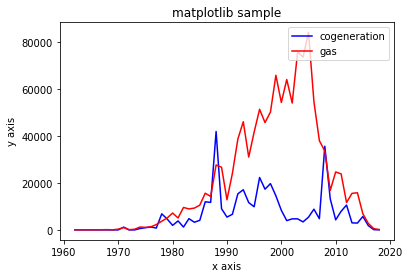

In [98]:
from matplotlib import pyplot as plt
import numpy as np

x=table_heat_fuel['year_of_completion']
y_con = table_heat_fuel['cogeneration']
y_gas = table_heat_fuel['gas']

plt.plot(x,y_con,'b',label='cogeneration')
plt.plot(x,y_gas,'r',label='gas')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right')
plt.show()


In [99]:
list_con_year=[1971,1978,1988,2008]

In [100]:
df_na_heat_fuel=df_na_heat_fuel.reset_index()

In [101]:
len(df_na_heat_fuel)

18733

In [102]:
for i in range(len(df_na_heat_fuel)):
    if df_na_heat_fuel['year_of_completion'][i] in list_con_year:
        df_na_heat_fuel['heat_fuel'][i]="cogeneration"
    else:
        df_na_heat_fuel['heat_fuel'][i]="gas"
    if i%1000==0:
        print(i)

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0


C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000


In [103]:
del df_na_heat_fuel['index']

In [104]:
df_heat_fuel1=pd.concat([df_heat_fuel,df_na_heat_fuel],axis=0)

In [105]:
df_heat_fuel1['heat_fuel'].value_counts()

gas             1225780
cogeneration     379596
Name: heat_fuel, dtype: int64

In [106]:
df_heat_fuel1

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,supply_area,total_household_count_of_area_type,front_door_structure,transaction_real_price,transaction_year_month_date,total_parking_capacity_in_site,room_count,bathroom_count,tallest_building_in_sites,lowest_building_in_sites
0,0,5584,1,200601,20,1999,47.4300,6,37.585965,127.000231,...,65.63,46,corridor,215000000,2006-01-20,163.0,1.0,1.0,8.0,4.0
1,1,5584,1,200601,20,1999,44.3700,8,37.585965,127.000231,...,61.39,10,corridor,200000000,2006-01-20,163.0,2.0,1.0,8.0,4.0
2,2,5059,1,200601,20,1992,54.7000,8,37.580511,127.014016,...,72.36,201,corridor,168000000,2006-01-20,902.0,2.0,1.0,14.0,9.0
3,3,2816,1,200601,20,1993,64.6600,11,37.580324,127.011788,...,87.30,284,corridor,165000000,2006-01-20,902.0,2.0,1.0,15.0,11.0
4,4,2816,1,200601,20,1993,106.6200,7,37.580324,127.011788,...,127.74,112,stairway,280000000,2006-01-20,902.0,4.0,2.0,15.0,11.0
5,5,2815,1,200601,20,2000,84.9200,9,37.575381,126.960804,...,109.88,454,stairway,415000000,2006-01-20,1365.0,3.0,2.0,23.0,10.0
6,6,2815,1,200601,20,2000,60.0000,13,37.575381,126.960804,...,84.33,207,corridor,267000000,2006-01-20,1365.0,3.0,1.0,23.0,10.0
7,7,9867,1,200601,20,2005,84.7600,10,37.559200,127.019503,...,104.30,82,stairway,415000000,2006-01-20,652.0,3.0,2.0,23.0,6.0
8,8,2818,1,200601,20,1999,84.8800,18,37.555060,127.014495,...,107.65,576,stairway,310000000,2006-01-20,2091.0,3.0,2.0,20.0,8.0
9,9,2817,1,200601,20,2002,59.9400,12,37.549828,127.009284,...,85.90,864,corridor,319000000,2006-01-20,4329.0,3.0,1.0,18.0,11.0


In [107]:
df_heat_fuel1.to_csv("./duranduranreturns_data/숫자결측치완성1.csv", encoding='utf-8')

In [108]:
df_na_front_door=df_heat_fuel1[df_heat_fuel1['front_door_structure']=="-"]
df_front_door=df_heat_fuel1[df_heat_fuel1['front_door_structure']!="-"]

In [109]:
df_front_door['front_door_structure'].value_counts()

stairway    1149278
corridor     415985
mixed         26154
Name: front_door_structure, dtype: int64

In [110]:
df_na_front_door['front_door_structure'].value_counts()

-    13959
Name: front_door_structure, dtype: int64

In [111]:
table_front_door=pd.crosstab(df_front_door.year_of_completion, df_front_door.front_door_structure, margins=False).reset_index()
table_front_door.head()

front_door_structure,year_of_completion,corridor,mixed,stairway
0,1962,107,0,95
1,1966,0,0,44
2,1968,39,0,76
3,1969,100,0,0
4,1970,25,0,307


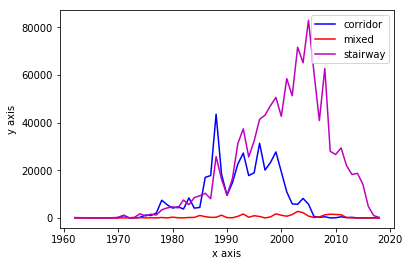

In [112]:
from matplotlib import pyplot as plt
import numpy as np

x=table_front_door['year_of_completion']
y_corr = table_front_door['corridor']
y_mix = table_front_door['mixed']
y_stair = table_front_door['stairway']

plt.plot(x,y_corr,'b',label='corridor')
plt.plot(x,y_mix,'r',label='mixed')
plt.plot(x,y_stair,'m',label='stairway')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(loc='upper right')
plt.show()

In [113]:
df_mixed1=table_front_door[table_front_door['mixed']>=table_front_door['corridor']]
df_mixed1

front_door_structure,year_of_completion,corridor,mixed,stairway
1,1966,0,0,44
7,1973,0,0,291
41,2007,242,402,40859
42,2008,495,1282,62753
43,2009,0,1568,27931
44,2010,61,1446,26628
45,2011,482,1335,29385
46,2012,129,166,21921
48,2014,0,0,18702
49,2015,1,16,14170


In [114]:
df_mixed2=table_front_door[table_front_door['mixed']>=table_front_door['stairway']]
df_mixed2

front_door_structure,year_of_completion,corridor,mixed,stairway
3,1969,100,0,0
6,1972,55,47,0


In [115]:
df_corr=table_front_door[table_front_door['corridor']>=table_front_door['stairway']]

In [116]:
list_mix=list(df_mixed1['year_of_completion'])+list(df_mixed2['year_of_completion'])
list_corr=list(df_corr['year_of_completion'])

In [117]:
df_na_front_door=df_na_front_door.reset_index()

In [118]:
for i in range(len(df_na_front_door)):
    if df_na_front_door['year_of_completion'][i] in list_mix:
        df_na_front_door['front_door_structure'][i]="mixed"
    elif df_na_front_door['year_of_completion'][i] in list_corr:
        df_na_front_door['front_door_structure'][i]="corridor"
    else:
        df_na_front_door['front_door_structure'][i]="stairway"



C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
df_front_door1=pd.concat([df_front_door,df_na_front_door],axis=0)

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [120]:
df_front_door1['front_door_structure'].value_counts()

stairway    1154859
corridor     416747
mixed         33770
Name: front_door_structure, dtype: int64

In [121]:
df_front_door1.columns

Index(['address_by_law', 'apartment_building_count_in_sites', 'apartment_id',
       'bathroom_count', 'city', 'exclusive_use_area', 'floor',
       'front_door_structure', 'heat_fuel', 'heat_type', 'index', 'key',
       'latitude', 'longitude', 'lowest_building_in_sites', 'room_count',
       'room_id', 'supply_area', 'tallest_building_in_sites',
       'total_household_count_in_sites', 'total_household_count_of_area_type',
       'total_parking_capacity_in_site', 'transaction_date',
       'transaction_real_price', 'transaction_year_month',
       'transaction_year_month_date', 'year_of_completion'],
      dtype='object')

In [123]:
df_front_door1.to_csv("./duranduranreturns_data/숫자결측치완성2.csv", encoding='ms949')

In [124]:
df_total=pd.read_csv('./duranduranreturns_data/숫자결측치완성2.csv', sep=',', encoding='ms949',engine='python')
df_total

,Unnamed: 0,address_by_law,apartment_building_count_in_sites,apartment_id,bathroom_count,city,exclusive_use_area,floor,front_door_structure,heat_fuel,...,supply_area,tallest_building_in_sites,total_household_count_in_sites,total_household_count_of_area_type,total_parking_capacity_in_site,transaction_date,transaction_real_price,transaction_year_month,transaction_year_month_date,year_of_completion
0,0,1111017100,1,5584,1.0,1,47.4300,6,corridor,gas,...,65.63,8.0,136,46,163.0,20,215000000,200601,2006-01-20,1999
1,1,1111017100,1,5584,1.0,1,44.3700,8,corridor,gas,...,61.39,8.0,136,10,163.0,20,200000000,200601,2006-01-20,1999
2,2,1111017400,5,5059,1.0,1,54.7000,8,corridor,gas,...,72.36,14.0,585,201,902.0,20,168000000,200601,2006-01-20,1992
3,3,1111017400,7,2816,1.0,1,64.6600,11,corridor,gas,...,87.30,15.0,919,284,902.0,20,165000000,200601,2006-01-20,1993
4,4,1111017400,7,2816,2.0,1,106.6200,7,stairway,gas,...,127.74,15.0,919,112,902.0,20,280000000,200601,2006-01-20,1993
5,5,1111018700,12,2815,2.0,1,84.9200,9,stairway,gas,...,109.88,23.0,964,454,1365.0,20,415000000,200601,2006-01-20,2000
6,6,1111018700,12,2815,1.0,1,60.0000,13,corridor,gas,...,84.33,23.0,964,207,1365.0,20,267000000,200601,2006-01-20,2000
7,7,1114016200,9,9867,2.0,1,84.7600,10,stairway,gas,...,104.30,23.0,461,82,652.0,20,415000000,200601,2006-01-20,2005
8,8,1114016200,19,2818,2.0,1,84.8800,18,stairway,gas,...,107.65,20.0,2282,576,2091.0,20,310000000,200601,2006-01-20,1999
9,9,1114016200,42,2817,1.0,1,59.9400,12,corridor,gas,...,85.90,18.0,5150,864,4329.0,20,319000000,200601,2006-01-20,2002


In [125]:
df_total.columns

Index(['Unnamed: 0', 'address_by_law', 'apartment_building_count_in_sites',
       'apartment_id', 'bathroom_count', 'city', 'exclusive_use_area', 'floor',
       'front_door_structure', 'heat_fuel', 'heat_type', 'index', 'key',
       'latitude', 'longitude', 'lowest_building_in_sites', 'room_count',
       'room_id', 'supply_area', 'tallest_building_in_sites',
       'total_household_count_in_sites', 'total_household_count_of_area_type',
       'total_parking_capacity_in_site', 'transaction_date',
       'transaction_real_price', 'transaction_year_month',
       'transaction_year_month_date', 'year_of_completion'],
      dtype='object')

In [126]:
del df_total['Unnamed: 0']

In [127]:
df_total['index']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
             ...    
1605346    1603135.0
1605347    1603221.0
1605348    1603628.0
1605349    1603793.0
1605350    1603829.0
1605351    1604017.0
1605352    1604022.0
1605353    1604029.0
1605354    1604081.0
1605355    1604115.0
1605356    1604160.0
1605357    1604421.0
1605358    1604614.0
1605359    1604624.0
1605360    1604699.0
1605361    1604939.0
1605362    16

In [128]:
df_total.isna().sum()

address_by_law                              0
apartment_building_count_in_sites           0
apartment_id                                0
bathroom_count                              0
city                                        0
exclusive_use_area                          0
floor                                       0
front_door_structure                        0
heat_fuel                                   0
heat_type                                2045
index                                 1591417
key                                         0
latitude                                    0
longitude                                   0
lowest_building_in_sites                    0
room_count                                  0
room_id                                     0
supply_area                                 0
tallest_building_in_sites                   0
total_household_count_in_sites              0
total_household_count_of_area_type          0
total_parking_capacity_in_site    

In [129]:
df_na_heat_type=df_total[df_total['heat_type'].isna()==True]
df_heat_type=df_total[df_total['heat_type'].isna()==False]

In [130]:
df_heat_type['heat_type'].value_counts()

individual    1088883
district       380495
central        133953
Name: heat_type, dtype: int64

In [131]:
df_na_heat_type['heat_type'].head()

1583812    NaN
1583813    NaN
1583864    NaN
1583865    NaN
1583909    NaN
Name: heat_type, dtype: object

In [132]:
table_heat_type=pd.crosstab(df_heat_type.year_of_completion, df_heat_type.heat_type, margins=False).reset_index()
table_heat_type.head()

heat_type,year_of_completion,central,district,individual
0,1962,0,0,223
1,1966,0,0,44
2,1968,0,0,115
3,1969,0,0,100
4,1970,0,0,332


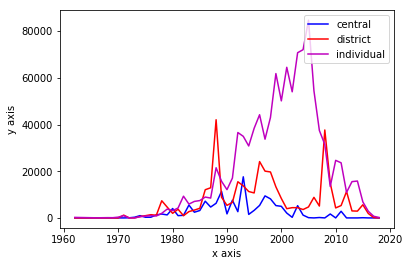

In [133]:
from matplotlib import pyplot as plt
import numpy as np

x=table_heat_type['year_of_completion']
y_central = table_heat_type['central']
y_district = table_heat_type['district']
y_individual = table_heat_type['individual']

plt.plot(x,y_central,'b',label='central')
plt.plot(x,y_district,'r',label='district')
plt.plot(x,y_individual,'m',label='individual')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(loc='upper right')
plt.show()

In [134]:
df_central1=table_heat_type[table_heat_type['central']>=table_heat_type['district']]
df_central2=table_heat_type[table_heat_type['central']>=table_heat_type['individual']]

In [135]:
df_distric=table_heat_type[table_heat_type['district']>=table_heat_type['individual']]

In [136]:
list_central=list(df_central1['year_of_completion'])+list(df_central2['year_of_completion'])
list_distric=list(df_distric['year_of_completion'])

In [137]:
df_na_heat_type=df_na_heat_type.reset_index()

In [138]:
for i in range(len(df_na_heat_type)):
    if df_na_heat_type['year_of_completion'][i] in list_central:
        df_na_heat_type['heat_type'][i]="central"
    elif df_na_heat_type['year_of_completion'][i] in list_distric:
        df_na_heat_type['heat_type'][i]="distric"
    else:
        df_na_heat_type['heat_type'][i]="individual"

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [139]:
df_heat_type1=pd.concat([df_heat_type,df_na_heat_type],axis=0)

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [140]:
df_heat_type1['heat_type'].value_counts()

individual    1090928
district       380495
central        133953
Name: heat_type, dtype: int64

In [141]:
del df_heat_type1['level_0']
del df_heat_type1['index']

In [142]:
df_heat_type1.isna().sum()

address_by_law                        0
apartment_building_count_in_sites     0
apartment_id                          0
bathroom_count                        0
city                                  0
exclusive_use_area                    0
floor                                 0
front_door_structure                  0
heat_fuel                             0
heat_type                             0
key                                   0
latitude                              0
longitude                             0
lowest_building_in_sites              0
room_count                            0
room_id                               0
supply_area                           0
tallest_building_in_sites             0
total_household_count_in_sites        0
total_household_count_of_area_type    0
total_parking_capacity_in_site        0
transaction_date                      0
transaction_real_price                0
transaction_year_month                0
transaction_year_month_date           0


In [143]:
df_heat_type1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605376 entries, 0 to 2044
Data columns (total 26 columns):
address_by_law                        1605376 non-null int64
apartment_building_count_in_sites     1605376 non-null int64
apartment_id                          1605376 non-null int64
bathroom_count                        1605376 non-null float64
city                                  1605376 non-null int64
exclusive_use_area                    1605376 non-null float64
floor                                 1605376 non-null int64
front_door_structure                  1605376 non-null object
heat_fuel                             1605376 non-null object
heat_type                             1605376 non-null object
key                                   1605376 non-null int64
latitude                              1605376 non-null float64
longitude                             1605376 non-null float64
lowest_building_in_sites              1605376 non-null float64
room_count             

In [144]:
df_heat_type1.to_csv("./duranduranreturns_data/숫자결측치총완성!!!.csv", encoding='utf-8')

In [145]:
df_total=pd.read_csv('./duranduranreturns_data/숫자결측치총완성!!!.csv',  encoding='utf-8',engine='python')

In [146]:
df_total.head()

,Unnamed: 0,address_by_law,apartment_building_count_in_sites,apartment_id,bathroom_count,city,exclusive_use_area,floor,front_door_structure,heat_fuel,...,supply_area,tallest_building_in_sites,total_household_count_in_sites,total_household_count_of_area_type,total_parking_capacity_in_site,transaction_date,transaction_real_price,transaction_year_month,transaction_year_month_date,year_of_completion
0,0,1111017100,1,5584,1.0,1,47.43,6,corridor,gas,...,65.63,8.0,136,46,163.0,20,215000000,200601,2006-01-20,1999
1,1,1111017100,1,5584,1.0,1,44.37,8,corridor,gas,...,61.39,8.0,136,10,163.0,20,200000000,200601,2006-01-20,1999
2,2,1111017400,5,5059,1.0,1,54.70,8,corridor,gas,...,72.36,14.0,585,201,902.0,20,168000000,200601,2006-01-20,1992
3,3,1111017400,7,2816,1.0,1,64.66,11,corridor,gas,...,87.30,15.0,919,284,902.0,20,165000000,200601,2006-01-20,1993
4,4,1111017400,7,2816,2.0,1,106.62,7,stairway,gas,...,127.74,15.0,919,112,902.0,20,280000000,200601,2006-01-20,1993


In [147]:
del df_total['Unnamed: 0']

In [148]:
df_total.shape

(1605376, 26)

In [149]:
df_interest_rate=pd.read_csv("./duranduranreturns_data/interest_rates.csv")
df_interest_rate.head()

,Unnamed: 0,household_loan,mean_loan,mortgage_loan,transaction_year_month
0,0,5.69,5.79,5.64,200601
1,1,5.71,5.76,5.58,200602
2,2,5.68,5.89,5.46,200603
3,3,5.62,5.83,5.42,200604
4,4,5.64,5.89,5.41,200605


In [150]:
df_total1=pd.merge(df_total, df_interest_rate,how='left',on='transaction_year_month')
df_total1.shape

(1605376, 30)

In [151]:
df_total1.columns

Index(['address_by_law', 'apartment_building_count_in_sites', 'apartment_id',
       'bathroom_count', 'city', 'exclusive_use_area', 'floor',
       'front_door_structure', 'heat_fuel', 'heat_type', 'key', 'latitude',
       'longitude', 'lowest_building_in_sites', 'room_count', 'room_id',
       'supply_area', 'tallest_building_in_sites',
       'total_household_count_in_sites', 'total_household_count_of_area_type',
       'total_parking_capacity_in_site', 'transaction_date',
       'transaction_real_price', 'transaction_year_month',
       'transaction_year_month_date', 'year_of_completion', 'Unnamed: 0',
       'household_loan', 'mean_loan', 'mortgage_loan'],
      dtype='object')

In [152]:
df_total1.head()

,address_by_law,apartment_building_count_in_sites,apartment_id,bathroom_count,city,exclusive_use_area,floor,front_door_structure,heat_fuel,heat_type,...,total_parking_capacity_in_site,transaction_date,transaction_real_price,transaction_year_month,transaction_year_month_date,year_of_completion,Unnamed: 0,household_loan,mean_loan,mortgage_loan
0,1111017100,1,5584,1.0,1,47.43,6,corridor,gas,individual,...,163.0,20,215000000,200601,2006-01-20,1999,0,5.69,5.79,5.64
1,1111017100,1,5584,1.0,1,44.37,8,corridor,gas,individual,...,163.0,20,200000000,200601,2006-01-20,1999,0,5.69,5.79,5.64
2,1111017400,5,5059,1.0,1,54.70,8,corridor,gas,individual,...,902.0,20,168000000,200601,2006-01-20,1992,0,5.69,5.79,5.64
3,1111017400,7,2816,1.0,1,64.66,11,corridor,gas,individual,...,902.0,20,165000000,200601,2006-01-20,1993,0,5.69,5.79,5.64
4,1111017400,7,2816,2.0,1,106.62,7,stairway,gas,individual,...,902.0,20,280000000,200601,2006-01-20,1993,0,5.69,5.79,5.64


In [154]:
df_total1.columns

Index(['address_by_law', 'apartment_building_count_in_sites', 'apartment_id',
       'bathroom_count', 'city', 'exclusive_use_area', 'floor',
       'front_door_structure', 'heat_fuel', 'heat_type', 'key', 'latitude',
       'longitude', 'lowest_building_in_sites', 'room_count', 'room_id',
       'supply_area', 'tallest_building_in_sites',
       'total_household_count_in_sites', 'total_household_count_of_area_type',
       'total_parking_capacity_in_site', 'transaction_date',
       'transaction_real_price', 'transaction_year_month',
       'transaction_year_month_date', 'year_of_completion', 'Unnamed: 0',
       'household_loan', 'mean_loan', 'mortgage_loan'],
      dtype='object')

In [155]:
df_total1 = df_total1[[ 'key','city','apartment_id','address_by_law', 'transaction_date', 'transaction_year_month',
       'transaction_year_month_date', 'year_of_completion','apartment_building_count_in_sites', 
       'bathroom_count',  'exclusive_use_area', 'floor',
       'front_door_structure', 'heat_fuel', 'heat_type', 'latitude',
       'longitude',  'room_count', 'room_id',
       'supply_area', 'tallest_building_in_sites','lowest_building_in_sites',
       'total_household_count_in_sites', 'total_household_count_of_area_type',
       'total_parking_capacity_in_site',  'household_loan',
       'mean_loan', 'mortgage_loan',
       'transaction_real_price']]

In [156]:
del df_total1['transaction_year_month_date']

In [157]:
one_hot_heat_type = pd.get_dummies(df_total1['heat_type'])
one_hot_heat_fuel = pd.get_dummies(df_total1['heat_fuel'])
one_hot_front_door_structure = pd.get_dummies(df_total1['front_door_structure'])

In [158]:
df_total2=pd.concat([df_total1,one_hot_heat_type,one_hot_heat_fuel,one_hot_front_door_structure], axis=1)
df_total2.shape

(1605376, 36)

In [159]:
df_total2.columns

Index(['key', 'city', 'apartment_id', 'address_by_law', 'transaction_date',
       'transaction_year_month', 'year_of_completion',
       'apartment_building_count_in_sites', 'bathroom_count',
       'exclusive_use_area', 'floor', 'front_door_structure', 'heat_fuel',
       'heat_type', 'latitude', 'longitude', 'room_count', 'room_id',
       'supply_area', 'tallest_building_in_sites', 'lowest_building_in_sites',
       'total_household_count_in_sites', 'total_household_count_of_area_type',
       'total_parking_capacity_in_site', 'household_loan', 'mean_loan',
       'mortgage_loan', 'transaction_real_price', 'central', 'district',
       'individual', 'cogeneration', 'gas', 'corridor', 'mixed', 'stairway'],
      dtype='object')

In [160]:
del df_total2['heat_type']
del df_total2['heat_fuel']
del df_total2['front_door_structure']

In [163]:
df_total2.to_csv('./duranduranreturns_data/real_perfect_dataset.csv', sep=',', encoding='utf-8',index=False)

In [164]:
df_total2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605376 entries, 0 to 1605375
Data columns (total 33 columns):
key                                   1605376 non-null int64
city                                  1605376 non-null int64
apartment_id                          1605376 non-null int64
address_by_law                        1605376 non-null int64
transaction_date                      1605376 non-null int64
transaction_year_month                1605376 non-null int64
year_of_completion                    1605376 non-null int64
apartment_building_count_in_sites     1605376 non-null int64
bathroom_count                        1605376 non-null float64
exclusive_use_area                    1605376 non-null float64
floor                                 1605376 non-null int64
latitude                              1605376 non-null float64
longitude                             1605376 non-null float64
room_count                            1605376 non-null float64
room_id                

In [166]:
df_total2[df_total2.transaction_real_price == 0]

,key,city,apartment_id,address_by_law,transaction_date,transaction_year_month,year_of_completion,apartment_building_count_in_sites,bathroom_count,exclusive_use_area,...,mortgage_loan,transaction_real_price,central,district,individual,cogeneration,gas,corridor,mixed,stairway
1568913,462533,1,3751,1168010400,31,200912,1984,4,1.0,83.5800,...,5.90,0,0,1,0,1,0,1,0,0
1568914,764018,1,14029,1111013700,10,201304,1968,1,0.0,107.1700,...,3.86,0,0,0,1,0,1,1,0,0
1568915,813528,1,12304,1111017400,30,201309,1968,4,1.0,36.1700,...,3.82,0,0,0,1,0,1,0,0,1
1568916,845097,1,22241,1150010200,10,201312,2007,1,2.0,45.6700,...,3.74,0,0,0,1,0,1,0,0,1
1568917,856338,1,316,1135010600,10,201401,1988,2,1.0,41.8500,...,3.75,0,0,0,1,0,1,0,0,1
1568918,977181,1,14140,1117013100,10,201411,1972,1,2.0,124.5000,...,3.30,0,1,0,0,0,1,1,0,0
1568919,1037012,1,18263,1135010600,10,201503,2008,4,2.0,84.4680,...,2.97,0,0,0,1,0,1,0,0,1
1568920,1158117,1,1299,1165010600,31,201510,1983,1,2.0,143.9500,...,2.90,0,0,1,0,1,0,0,0,1
1568921,1204038,1,34895,1144012700,10,201603,2010,2,2.0,84.7800,...,2.97,0,0,1,0,1,0,0,0,1
1568922,1204146,1,710,1135010400,10,201603,1989,15,1.0,59.2200,...,2.97,0,1,0,0,0,1,1,0,0


In [ ]:
df_total2

In [ ]:
df_total=pd.read_csv('./duranduranreturns_data/real_perfect_dataset.csv', encoding='utf-8',engine='python')
df_total.head()

In [ ]:
# df_district=pd.read_csv('./data/district.csv', engine='python')

In [ ]:
# df_district1=df_district[['법정동코드','법정동명']]

In [ ]:
# df_district1 = df_district1.rename(columns={'법정동코드': 'address_by_law',  '법정동명': 'district'})

In [ ]:
len(set(df_total['address_by_law'])), len(set(df_district1['address_by_law'])), 

In [ ]:
df_district1['address_by_law']

In [ ]:
df_total2.columns

In [ ]:
df_total3=df_total2[df_total2['transaction_real_price']!=0]
df_total3=df_total3[[ 'transaction_year_month', 'address_by_law','apartment_id','transaction_real_price']]

In [ ]:
df_total3.groupby(['transaction_year_month','address_by_law','apartment_id']).mean()